In [24]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [469]:
# Average number of games a player misses in their career
ft['percentage of games missed'].mean()

18.317344213649676

In [25]:
# Read in merged table
ft = pd.read_csv('finaltable.csv')

In [524]:
ft.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,1998-1999,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,1999-2000,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,2000-2001,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,1998-1999,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,1999-2000,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [525]:
# Get the count of each weight value
value_counts = ft['weight'].value_counts()

# Select the values where the count is less than or equal to 12
to_remove = value_counts[value_counts <= 12].index

# Keep rows where the weight column is not in to_remove
ft = ft[~ft.weight.isin(to_remove)]

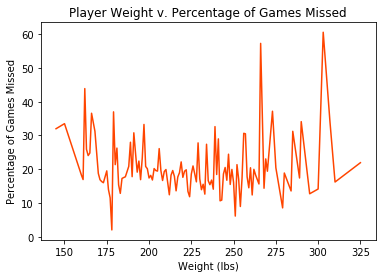

<Figure size 720x720 with 0 Axes>

In [205]:
# Group together weight and % of games missed. Group by weight. Find mean of % of games missed for each weight.

ftgroup = ft[['percentage of games missed','weight']]
ftgroup1 = ftgroup.groupby('weight')
ftgroup2 = ftgroup1.mean()

# Plot line graph and save as png

plt.plot(ftgroup1.mean(), color='orangered')
plt.title('Player Weight v. Percentage of Games Missed', fontsize=12)
plt.ylabel('Percentage of Games Missed')
plt.xlabel('Weight (lbs)')
plt.savefig('./fig1.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

In [27]:
# Get the count of each height value
value_counts = ft['height'].value_counts()

# Select the values where the count is less than or equal to 10
to_remove = value_counts[value_counts <= 10].index

# Keep rows where the height column is not in to_remove
ft = ft[~ft.height.isin(to_remove)]

In [136]:
# Group together height and % of games missed. Group by height. Find mean of % of games missed for each height.
gmht = ft[['percentage of games missed','height']]
gmhtgroup = gmht.groupby('height')
gmhtgroup2 = gmhtgroup.mean()

In [137]:
gmhtgroup2

,percentage of games missed
height,
5-10,20.538462
5-11,19.382979
5-9,19.864706
6-0,19.704278
6-1,18.792923
6-10,19.880844
6-11,17.432692
6-2,20.961024
6-3,17.635657


In [144]:
#Reset Index. Reindex so heights are in ascending order. Reset index again. Drop extra index column. 

gmhtgroup2 = gmhtgroup2.reset_index() 

gmhtgroup2 = gmhtgroup2.reindex([2,0,1,3,4,7,8,9,10,11,12,13,14,5,6,15,16,17,18,19])

gmhtgroup2 = gmhtgroup2.reset_index() 

gmhtgroup2.drop(labels=['index'], axis="columns", inplace=True)

In [145]:
# Updated table
gmhtgroup2

,height,percentage of games missed
0,5-9,19.864706
1,5-10,20.538462
2,5-11,19.382979
3,6-0,19.704278
4,6-1,18.792923
5,6-2,20.961024
6,6-3,17.635657
7,6-4,19.606069
8,6-5,17.132836
9,6-6,19.268558


<Figure size 720x720 with 0 Axes>

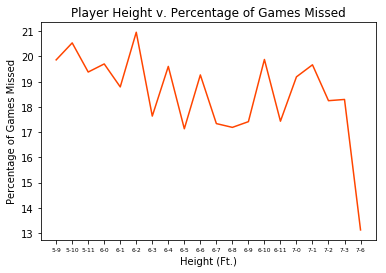

<Figure size 720x720 with 0 Axes>

In [204]:
# Plot line graph and save as PNG.

plt.plot(list(gmhtgroup2.height), gmhtgroup2['percentage of games missed'], color="orangered")
plt.title('Player Height v. Percentage of Games Missed', fontsize=12)
plt.ylabel('Percentage of Games Missed')
plt.xlabel('Height (Ft.)')
plt.xticks(fontsize=6)
plt.savefig('./fig2.png', dpi=300)
plt.figure(figsize=(10,10))

In [30]:
# Get the count of each value
value_counts = ft['minutes_per_game'].value_counts()

# Select the values where the count is less or equal to 2
to_remove = value_counts[value_counts <= 2].index

# Keep rows where the minutes per game column is not in to_remove
ft = ft[~ft.minutes_per_game.isin(to_remove)]

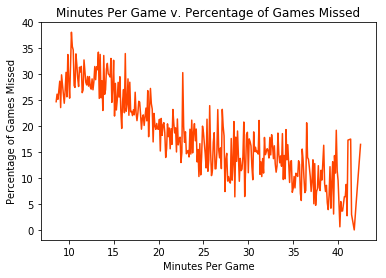

<Figure size 720x720 with 0 Axes>

In [203]:
# Group together minute per game and % of games missed. 
# Group by minutes per game. Find mean of % of games missed for each minutes per game.

gmmin = ft[['percentage of games missed','minutes_per_game']]
gmmingroup = gmmin.groupby('minutes_per_game')
gmmingroupmean = gmmingroup.mean()

# Line graph and save as PNG

plt.plot(gmmingroup.mean(), color ="orangered")
plt.title('Minutes Per Game v. Percentage of Games Missed', fontsize=12)
plt.ylabel('Percentage of Games Missed')
plt.xlabel('Minutes Per Game')
plt.savefig('./fig3.png', dpi=300)
plt.figure(figsize=(10,10))

plt.show()

In [178]:
# Create dictionary of abbreviated years/seasons

seasonabv = ['98-99','99-00', '00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
             '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16','16-17', '17-18']

# Replace old years/seasons with new abbreviated years/seasons

ftsnrp = ft.replace({'season': {'1998-1999': '98-99', '1999-2000': '99-00', '2000-2001': '00-01',
                                '2001-2002': '01-02', '2002-2003': '02-03', '2003-2004': '03-04',
                                '2004-2005': '04-05', '2005-2006': '05-06', '2006-2007': '06-07',
                                '2007-2008': '07-08', '2008-2009': '08-09', '2009-2010': '09-10',
                                '2010-2011': '10-11', '2011-2012': '11-12',
                                '2012-2013': '12-13', '2013-2014': '13-14', '2014-2015': '14-15',
                                '2015-2016': '15-16', '2016-2017': '16-17', '2017-2018':'17-18'}})

ftsnrp.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,98-99,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,99-00,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,98-99,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,99-00,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [42]:
# Group percentage of games missed and season by season
# Find mean of percentage of games missed

gmsn = ftsnrp[['percentage of games missed','season']]
gmsngroup = gmsn.groupby('season')
sortlist = gmsngroup.mean() 

In [ ]:
# Reset index

sortlist1= sortlist.reset_index()

In [81]:
# Reindex order of years. Reset index again. 

sortlist3 = sortlist1.reindex([18, 19, 0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17])
sortlist4 = sortlist3.reset_index()
sortlist4

,index,season,percentage of games missed
0,18,98-99,14.716511
1,19,99-00,16.430124
2,0,00-01,17.517431
3,1,01-02,18.067913
4,2,02-03,16.350000
5,3,03-04,18.981346
6,4,04-05,18.293433
7,5,05-06,17.780428
8,6,06-07,17.867761
9,7,07-08,16.603659


In [82]:
# Drop extra index column

sortlist4.drop(labels=['index'], axis='columns', inplace=True)

In [119]:
# Export updated dataframe to CSV

sortlist4.to_csv("gmsn.csv", index=False)

In [253]:
# Import games missed per season file

gmsn = pd.read_csv('gmsn.csv')
gmsn.head()

,season,percentage of games missed
0,98-99,14.716511
1,99-00,16.430124
2,00-01,17.517431
3,01-02,18.067913
4,02-03,16.350000


In [259]:
# Reset index to season

gmsn1 = gmsn.set_index('season')

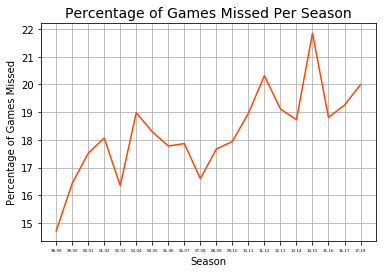

<Figure size 720x720 with 0 Axes>

In [262]:
# Line graph percentage of games missed per season

plt.plot(gmsn1, color="orangered")
plt.title('Percentage of Games Missed Per Season', fontsize=14)
plt.ylabel('Percentage of Games Missed')
plt.xlabel('Season')
plt.grid()
plt.xticks(fontsize=4)
plt.savefig('./fig5.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

In [127]:
# Export table with updated season a breviations

ftsnrp.to_csv("finaltable_update1.csv", index=False)

In [167]:
ftsnrp.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,98-99,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,99-00,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,98-99,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,99-00,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [169]:
# Import player salary per season table
ps1 = pd.read_csv('playersalary.csv')
ps1.head()

,player,player_salary,season
0,Kevin Garnett,"$25,200,000",2002/03
1,Shaquille O'Neal,"$23,571,429",2002/03
2,Alonzo Mourning,"$20,629,800",2002/03
3,Juwan Howard,"$20,625,000",2002/03
4,Scottie Pippen,"$19,727,524",2002/03


In [179]:
# Replace old years/seasons with new abbreviated years/seasons in this table as well so both tables match up

psrp = ps.replace({'season': {'2000/01': '00-01',
                                '2001/02': '01-02', '2002/03': '02-03', '2003/04': '03-04',
                                '2004/05': '04-05', '2005/06': '05-06', '2006/07': '06-07',
                                '2007/08': '07-08', '2008/09': '08-09', '2009/10': '09-10',
                                '2010/11': '10-11', '2011/12': '11-12',
                                '2012/13': '12-13', '2013/14': '13-14', '2014/15': '14-15',
                                '2015/16': '15-16', '2016/17': '16-17', '2017/18':'17-18'}})

In [184]:
psrp.head()
ftsnrp.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,98-99,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,99-00,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,98-99,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,99-00,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [180]:
# Merge dataframes

new_df1 = pd.merge(psrp, ftsnrp, on=('season', 'player'))


In [194]:
new_df1.to_csv('finaltable_playersalary.csv')

In [185]:
ps1 = pd.read_csv('playersalary.csv')

In [187]:
ps1.head()

,player,player_salary,season
0,Kevin Garnett,"$25,200,000",2002/03
1,Shaquille O'Neal,"$23,571,429",2002/03
2,Alonzo Mourning,"$20,629,800",2002/03
3,Juwan Howard,"$20,625,000",2002/03
4,Scottie Pippen,"$19,727,524",2002/03


In [275]:
# Dictionary to convert season/year to abbreviated

ps1rp = ps1.replace({'season': {'2000/01': '00-01',
                                '2001/02': '01-02', '2002/03': '02-03', '2003/04': '03-04',
                                '2004/05': '04-05', '2005/06': '05-06', '2006/07': '06-07',
                                '2007/08': '07-08', '2008/09': '08-09', '2009/10': '09-10',
                                '2010/11': '10-11', '2011/12': '11-12',
                                '2012/13': '12-13', '2013/14': '13-14', '2014/15': '14-15',
                                '2015/16': '15-16', '2016/17': '16-17', '2017/18':'17-18'}})

ps1rp.head()

,player,player_salary,season
0,Kevin Garnett,"$25,200,000",02-03
1,Shaquille O'Neal,"$23,571,429",02-03
2,Alonzo Mourning,"$20,629,800",02-03
3,Juwan Howard,"$20,625,000",02-03
4,Scottie Pippen,"$19,727,524",02-03


In [276]:
# Merge dataframes

new_df4 = pd.merge(ps1rp, ftsnrp, on=('season', 'player'))
new_df4.head()

,player,player_salary,season,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,Kevin Garnett,"$25,200,000",02-03,MIN,82,40.5,82,0.0,6-11,240
1,Shaquille O'Neal,"$23,571,429",02-03,LAL,67,37.8,82,18.3,7-1,325
2,Juwan Howard,"$20,625,000",02-03,DEN,77,35.4,82,6.1,6-9,240
3,Scottie Pippen,"$19,727,524",02-03,POR,64,29.9,82,22.0,6-8,210
4,Karl Malone,"$19,250,000",02-03,UTA,81,36.2,82,1.2,6-9,250


In [277]:
# Merge dataframes

new_df5 = pd.merge(ftsnrp, ps1rp, on=('season', 'player'))
new_df5.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,"$2,250,000"
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,"$1,818,000"
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,"$4,000,000"
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,"$4,500,000"
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,"$5,000,000"


In [204]:
new_df5.to_csv('finaltable_playersalary.csv')

In [278]:
new_df5.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,"$2,250,000"
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,"$1,818,000"
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,"$4,000,000"
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,"$4,500,000"
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,"$5,000,000"


In [213]:
ps_group1 = new_df5[['percentage of games missed','player_salary']]
ps_group2 = ps_group1.groupby('player_salary')
ps_group3 = ps_group2.mean()


In [218]:
# Sort player salary table by salary

ps_table = ps_group3.sort_values(by = 'player_salary', ascending=True)

In [ ]:
len(new_df5['player_salary'])

In [49]:
ps = pd.read_csv('finaltable_playersalary.csv')

In [51]:
# Drop index column
ps.drop(labels=['Unnamed: 0'], axis = "columns", inplace = True)

In [279]:
ps.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary,number of games missed
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,2.250,0
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,1.818,6
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,4.000,34
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,4.500,2
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,5.000,7


In [54]:
ps_group3.to_csv('testtable1.csv')

In [58]:
# Remove $ sign

ps_group1['player_salary'] = list(map(lambda x: x.strip('\$'), ps_group1['player_salary']))

In [59]:
# Repalce , with nothing

ps_group1['player_salary'] = ps_group1['player_salary'].str.replace(',', '')

In [61]:
# Chnage Player salary type to int

ps_group1['player_salary'] = ps_group1['player_salary'].astype('int64')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
type(ps_group1.player_salary[0])

numpy.int64

In [63]:
ps_group1 = ps_group1.sort_values(by = 'player_salary')

In [282]:
# Turn player salary to decimals

ps_group1['player_salary'] = ps_group1['player_salary']/1000


In [286]:
# verage Games Missed for each Salary Bin
bins = [0, 5, 10, 15, 20, 25, 30, 35]
ps_group1['salarybin'] = pd.cut(ps_group1['player_salary'], bins = bins, labels = ['<$5mm', '$5-10mm', '$10-15mm', '$15-20mm', '$20-25mm', '$25-30mm', '$30-35mm'])

In [67]:
# Create new table with salary bin and % games missed

ps_bins = ps_group1[['percentage of games missed','salarybin']]
ps_bins2 = ps_bins.groupby('salarybin')
ps_bins3 = ps_bins2.mean()
ps_bins3 = ps_bins3.reset_index()
ps_bins3

,salarybin,percentage of games missed
0,<$5mm,17.978978
1,$5-10mm,17.394973
2,$10-15mm,16.912208
3,$15-20mm,16.662255
4,$20-25mm,15.862338
5,$25-30mm,12.015789
6,$30-35mm,18.900000


In [69]:
# Swap Columns

ps_bins3 = ps_bins3[['percentage of games missed','salarybin']]
ps_bins3

,percentage of games missed,salarybin
0,17.978978,<$5mm
1,17.394973,$5-10mm
2,16.912208,$10-15mm
3,16.662255,$15-20mm
4,15.862338,$20-25mm
5,12.015789,$25-30mm
6,18.900000,$30-35mm


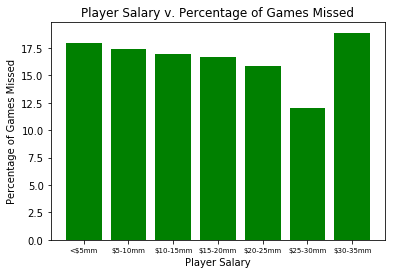

<Figure size 720x2160 with 0 Axes>

In [233]:
# Create bar graph

plt.bar(list(ps_bins3.salarybin),ps_bins3['percentage of games missed'], color='green')
plt.title('Player Salary v. Percentage of Games Missed', fontsize=12)
plt.ylabel('Percentage of Games Missed')
plt.xlabel('Player Salary')
plt.xticks(fontsize=7)
plt.savefig('./fig6.png', dpi=300)
plt.figure(figsize=(10,30))

plt.show()

In [71]:
fts = pd.read_csv('finaltable_playersalary.csv')

In [72]:
# Drop index label

fts.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)

In [73]:
fts.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary,number of games missed
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,2.250,0
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,1.818,6
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,4.000,34
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,4.500,2
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,5.000,7


In [74]:
# Group by team, salary and games missed

fts1 = fts[['percentage of games missed', 'player_salary', 'team']]
fts1.head()

,percentage of games missed,player_salary,team
0,0.0,2.250,MIA
1,7.3,1.818,PHI
2,41.5,4.000,PHI
3,2.4,4.500,PHI
4,8.5,5.000,PHI


In [79]:
# Change data type of salary column to int

fts['player_salary'] = fts['player_salary'].astype('int64')
fts.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary,number of games missed
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,2,0
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,1,6
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,4,34
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,4,2
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,5,7


In [375]:
fts.to_csv('finaltable_playersalary.csv', index = True)

In [80]:
# Create number of games missed column

fts['number of games missed'] = fts['Number of Games']-fts['games_played']

In [81]:
fts.to_csv('finaltable_playersalary.csv', index = True)

In [82]:
# Replace defunct franchises with new franchise name

fts['team'] = fts['team'].replace({'NJN': 'BRK', 'SEA': 'OKC', 'VAN': 'MEM'})
fts

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight,player_salary,number of games missed
0,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220,2,0
1,00-01,Aaron McKie,PHI,76,31.5,82,7.3,6-5,209,1,6
2,01-02,Aaron McKie,PHI,48,30.6,82,41.5,6-5,209,4,34
3,02-03,Aaron McKie,PHI,80,29.7,82,2.4,6-5,209,4,2
4,03-04,Aaron McKie,PHI,75,28.1,82,8.5,6-5,209,5,7
5,04-05,Aaron McKie,PHI,68,16.4,82,17.1,6-5,209,5,14
6,00-01,Aaron Williams,BRK,82,28.5,82,0.0,6-9,200,2,0
7,01-02,Aaron Williams,BRK,82,18.9,82,0.0,6-9,200,2,0
8,02-03,Aaron Williams,BRK,81,19.7,82,1.2,6-9,200,2,1
9,03-04,Aaron Williams,BRK,72,18.6,82,12.2,6-9,200,2,10


In [401]:
fts.to_csv('finaltable_playersalary.csv', index = True)

In [83]:
# Group new dataframe by sum games missed by team 
fts1 = fts[['team','number of games missed']]
fts2 = fts1.groupby('team')
fts3 = fts2.sum() 

In [84]:
fts3.sort_values(by='number of games missed')
fts3

,number of games missed
team,
ATL,2864
BOS,3101
BRK,3149
CHA,2714
CHI,3087
CLE,3161
DAL,2809
DEN,2783
DET,2419


In [85]:
# Group new dataframe by sum salary by team 

fts4 = fts[['team','player_salary']]
fts5 = fts4.groupby('team')
fts6 = fts5.sum()
fts6

,player_salary
team,
ATL,849
BOS,1059
BRK,931
CHA,760
CHI,879
CLE,1077
DAL,1217
DEN,794
DET,919


In [86]:
# Merge games missed and salary db

df = pd.merge(fts3, fts6, on='team')

In [87]:
df.head()

,number of games missed,player_salary
team,,
ATL,2864,849
BOS,3101,1059
BRK,3149,931
CHA,2714,760
CHI,3087,879


In [88]:
df = df.reset_index()
df.head()

,team,number of games missed,player_salary
0,ATL,2864,849
1,BOS,3101,1059
2,BRK,3149,931
3,CHA,2714,760
4,CHI,3087,879


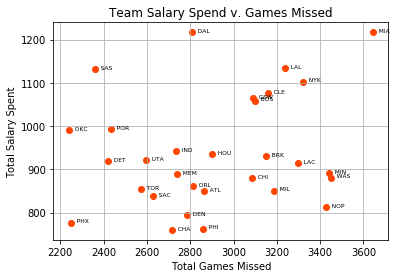

<Figure size 720x720 with 0 Axes>

In [291]:
# Scatter plot of games missed v. salary spent, by team. My favourite graph. Add team logos.

plt.scatter(df['number of games missed'], df['player_salary'], color = 'orangered' )

plt.grid()

for i in range(df.shape[0]):
    x = df.iloc[i, 1]
    y = df.iloc[i, 2]
    text = "   " + df.iloc[i, 0]
    
    plt.text(x, y, text, fontsize=6)
    plt.title('Team Salary Spend v. Games Missed', fontsize=12)
    plt.xlabel('Total Games Missed')
    plt.ylabel('Total Salary Spent')
    
    
    
plt.savefig('./fig7.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

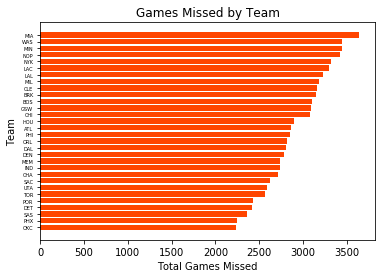

<Figure size 720x720 with 0 Axes>

In [211]:
# graph total games missed by team

gmtm = fts[['number of games missed','team']]
gmtmgroup = gmtm.groupby('team')
gmtmgroupmean = gmtmgroup.sum()
gmtmgroupmean = gmtmgroupmean.reset_index().sort_values('number of games missed', ascending=True)

plt.barh(gmtmgroupmean['team'], gmtmgroupmean['number of games missed'], color='Orangered')
plt.title('Games Missed by Team', fontsize=12)
plt.ylabel('Team')
plt.xlabel('Total Games Missed')
plt.xticks(fontsize=10)
plt.yticks(fontsize=5)
plt.savefig('./fig4.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

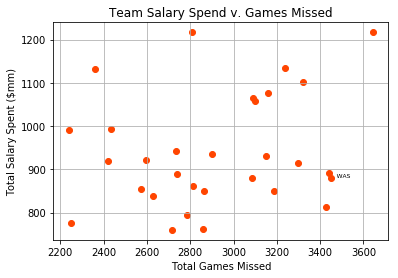

<Figure size 720x720 with 0 Axes>

In [293]:
# Graph without team names

plt.scatter(df['number of games missed'], df['player_salary'], color = 'orangered' )

plt.grid()


plt.text(x, y, text, fontsize=6)
plt.title('Team Salary Spend v. Games Missed', fontsize=12)
plt.xlabel('Total Games Missed')
plt.ylabel('Total Salary Spent ($mm)')
    
    
plt.savefig('./fig7.1.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()